# Laboraratorio #2: Regresión Lineal Bayesiana

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

### En la celda siguiente de definiran las funciónes para la generación de los sistemas con los que se van a trabajar. 

In [2]:
def sistema1(x,sigma = .1):
    w0 = -0.3
    w1 = 0.5
    y = w0 + w1*x
    e = sigma*np.random.randn(y.shape[0],y.shape[1])
    t = y + e
    return t,y

def sistema2(x,sigma = .02):
    y = np.sin(2*np.pi*x)
    e = sigma*np.random.randn(y.shape[0],y.shape[1])
    t = y + e
    return t,y


def plot_posterioriRecta(xx,tt,m,S,xlim = [-1,1],ylim = [-1,1],w = [-0.3,0.5],nF = 5,title = ''):
    #%% Para la gráfica del Piori
    x = np.linspace(xlim[0],xlim[1],50)
    y = np.linspace(ylim[0],ylim[1],50)
    w_x,w_y = np.meshgrid(x,y)
    wx_v = w_x.reshape((w_x.size,1))
    wy_v = w_y.reshape((w_y.size,1))
    pdf_mnd = multivariate_normal(m.reshape((m.size,)),S)
    Probability = pdf_mnd.pdf(np.concatenate((wx_v,wy_v),axis = 1)).reshape(w_x.shape)
    #%% Para generar los modelos apartir de la distribución
    W = np.random.multivariate_normal(m.reshape((m.size,)),S,nF) # apartir del vector de media y la matriz de covarianza genera nF valores aleatorios para w0 y w1
    yy = []
    X = []
    
    plt.figure()
    
    plt.subplot(1,2,2)
    for i in range(nF):
        yy = W[i,0] + W[i,1]*x
        plt.plot(x,yy,linewidth = 3,color = 'r')
    plt.plot(xx,tt,'ob',markersize = 5)
    plt.xlabel('x')
    #%% Graficas
    plt.subplot(1,2,1)
    #plt.imshow(Probability)
    plt.contourf(w_x,w_y,Probability)
    plt.plot(w[0],w[1],'+k',MarkerSize = 30,LineWidth = 10)
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.suptitle(title)
    plt.show()
    
def plot_posteriori(x,Phi,xx,tt,m,S,plot_std = False,t_mean =None,t_var=None,xlim = [-1,1],ylim = [-1,1],nF = 5,title = '',betaInv = 0.1):
    #%% Para la gráfica del Piori
    #%% Para generar los modelos apartir de la distribución
    W = np.random.multivariate_normal(m.reshape((m.size,)),S,nF) # apartir del vector de media y la matriz de covarianza genera nF valores aleatorios para w0 y w1
    yy = []
    X = []
    plt.figure()
    for i in range(nF):
        yy = (Phi@W[i,:].T).reshape(-1,1)
        plt.plot(x,yy,linewidth = 2,color = 'r')
    plt.plot(xx,tt,'ob',markersize = 5,label = 'instances')
    plt.xlabel('x')
    plt.xlabel('t')
    
    if not(t_mean is None):
        plt.plot(x,t_mean,color='green',linewidth=2,label = 't_pred')
        t_mean = t_mean.reshape((t_mean.size,))
        t_var = t_var.reshape((t_var.size,))
        plt.fill_between(x.reshape((x.size,)),t_mean-t_var,t_mean+t_var,alpha=0.5,color = 'grey',label = 't_var')
    if plot_std:
        t_mean = Phi@m
        t_var = np.diag(betaInv + Phi@S@Phi.T)
        t_mean = t_mean.reshape((t_mean.size,))
        t_var = t_var.reshape((t_var.size,))
        plt.fill_between(x.reshape((x.size,)),t_mean-t_var,t_mean+t_var,alpha=0.5,color = 'green',label = 'variance')
    plt.suptitle(title)
    plt.legend()
    plt.show()

El siguiente bloque define un arreglo uniformemente distribuido de valores (x) y calcula la salida del sistema uno (t) para cada valor. Además, se escogen de forma aleatoria $30$ muestras para el entrenamiento.

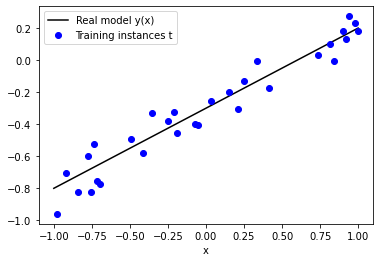

In [3]:
N = 100 # número total de muestras
x = np.linspace(-1,1,N).reshape(-1,1)
betaInv = 0.1
beta = float(1/betaInv)
t,y_real = sistema1(x,sigma=betaInv)
N_train = 30 # Número de muestras para el entrenamiento
ind_Train = np.random.permutation(N)[:N_train] # index de las muestras escogidas para entrenamiento
xTrain = x[ind_Train,:] # muestras de entrada para el entrenamiento
tTrain = t[ind_Train,:] # muestras de entrada para el entrenamiento

plt.figure()
plt.plot(x,y_real,'k',label = 'Real model y(x)')
plt.plot(xTrain,tTrain,'ob',label = 'Training instances t')
plt.xlabel('x')
plt.legend()
plt.show()

**A**. A partir las muestras generadas a través del sistema1, modelo lineal con ruido $\epsilon \sim \mathcal{N}(\mathbf{0},\beta^{-1}=0.01)$, y suponiendo que $\mathbf{w}\sim\mathcal{N}(\mathbf{m}_0=\mathbf{0},\mathbf{S}_0=\alpha^{-1}\mathbf{I}=2\mathbf{I})$. Deben de calcular el *MAP (Maximum A Posteriori)* a partir de una (1) muestra, dos (2) muestras, tres (3) muestras, etc. Y generar modelos a partir de las distribuciones a Porteriori. Para esto, desde el modelo de priori calcule el Posteriori($\mathbf{m}_n$,$\mathbf{S}_n$), primero con una muestra, y graficalo por medio de la función **plot_posteriori(XX,tt,mn,Sn)** (XX y tt son las muestras y sus salidas con las que calcularon $\mathbf{m}_n$ y $\mathbf{S}_n$). ¿Qué sucede a medida que va aumentando el número de muestras para el calculo del posteriori? ¿Tiene esto sentido?.

(5, 2)


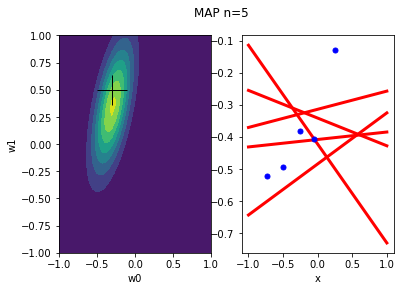

(10, 2)


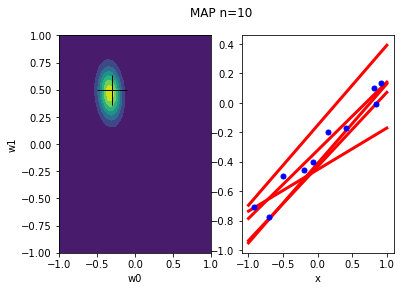

(15, 2)


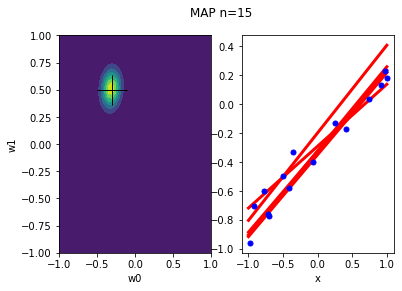

(20, 2)


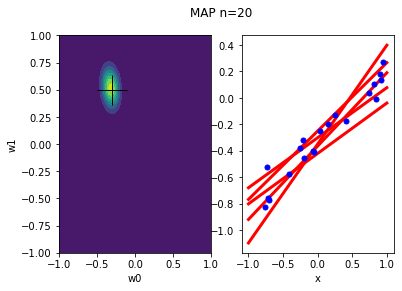

(25, 2)


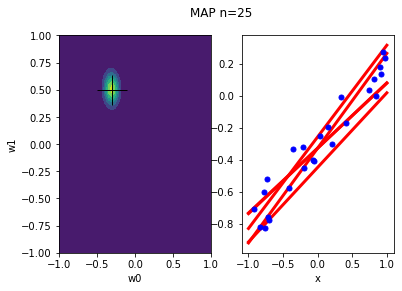

In [4]:
from numpy import linalg as LA
import random
M = 2 # Número de pesos
alphaInv = 2
alpha  = float(1/alphaInv)



#%% calculo de la probabilidad para parejas de (w0 y w1) y modelos lineales que pueden salir con este
#plot_posterioriRecta(xTrain,tTrain,m0,S0,title = 'Prior')

#%% Your code

for i in range(5):
    # Randomize data sorting and get some data form this
    n=(i+1)*5
    ind = np.random.permutation(N_train)[:n] # index de las muestras escogidas para entrenamiento
    xx = xTrain[ind]
    tt = tTrain[ind]

    # concatenacion por columnas
    Phi= np.concatenate((np.ones(xx.shape), xx), axis=1)
    print(Phi.shape)

    # np.eye is identity matrix
    Sn_inv=alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi

    # Sn2=1/(alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi)

    Sn=np.linalg.inv(Sn_inv)
    #print(Sn)
    #print(Sn2)

    mn=((beta*Sn)@Phi.T)@tt

    #print(mn)



    # escojan las muestras con las que van a usar para implementar MAP
    # Calcular mn y Sn con las muestras escojidas
    # usar la función plot_posteriori(XX,tt,mn,Sn) (XX y tt son las muestras y sus salidas con las que calcularon 𝐦𝑛 y 𝐒𝑛)

    plot_posterioriRecta(xx,tt,mn,Sn,title = 'MAP n='+str(n))

# Respuesta de A
> ## Que sucede a medida que aumentael numero de muestras para el calculo de psoteriori

A medida que se incrementa el N (Cantidad de datos) para el calculo de posteriori la varianza de los datos empieza a verse reducido (la grafica de la izquierda que es el posterior se reduce a su vez que la probabilidad) donde a su vez el modelo de lso datos se aproximan más al valor real. 

> ## ¿Tiene sentido el comportamiento identificado?

Tiene sentido por que tiene más información del **linspace** para formar al modelo, y como no son tan dispersos los hace mejorar

### El siguiente bloque define un arreglo uniformemente distribuido de valores (x) y calcula la salida del sistema dos (t) para cada valor. Además, se escogen de forma aleatoria $30$ muestras para el entrenamiento.

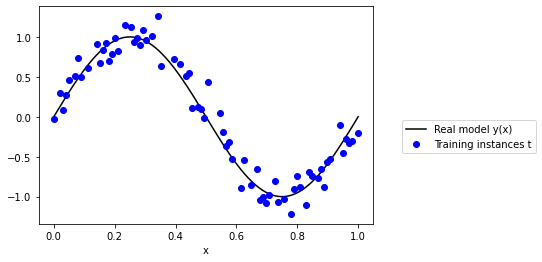

In [5]:
N = 100 # número total de muestras
x = np.linspace(0,1,N).reshape(-1,1)
betaInv = 0.15
beta = float(1/betaInv)
t,y_real = sistema2(x,sigma=betaInv)
N_train = 70 # Número de muestras para el entrenamiento
ind_Train = np.random.permutation(N)[:N_train] # index de las muestras escogidas para entrenamiento
xTrain = x[ind_Train,:] # muestras de entrada para el entrenamiento
tTrain = t[ind_Train,:] # muestras de entrada para el entrenamiento

plt.figure()
plt.plot(x,y_real,'k',label = 'Real model y(x)')
plt.plot(xTrain,tTrain,'ob',label = 'Training instances t')
plt.xlabel('x')
plt.legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

**B.** Para el sistema2 realice el mismo procedimiento que para solucionar el inciso **A**. ¿Qué sucedio? ¿Existe alguna forma de mejorarlo?

Para esta tarea use la función  
```python
plot_posteriori(x,Phi,xx,tt,m,S,t_mean =None,t_var=None,xlim = [-1,1],ylim = [-1,1],nF = 5,title = '',betaInv = 0.1)
```
; donde m = mn, S = Sn, y los demás argumentos son opcionales. El Phi que pide la función es el $\Phi(\boldsymbol{x})$ (sobre la variable x).  

[42  7  8 56 40 32 15]
Phi.shape:  (7, 2)
Phi_x.shape:  (100, 2)


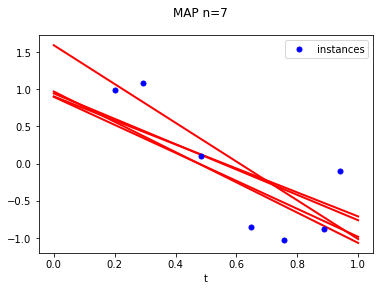

[29 10 52 21 44 60 47 43 68  3 55 57 66 20]
Phi.shape:  (14, 2)
Phi_x.shape:  (100, 2)


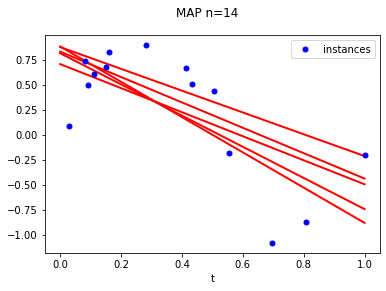

[51 16  8 59 10 15 13 54 17 42 39 21 18 61 44 53  1 40 32 22 25]
Phi.shape:  (21, 2)
Phi_x.shape:  (100, 2)


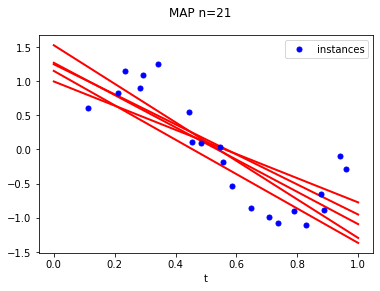

[24 10 60 48 64 46 63 69 43  5 22 53 52  0 26 33 37 35 56 66  6 68 30 31
 29 13 51 27]
Phi.shape:  (28, 2)
Phi_x.shape:  (100, 2)


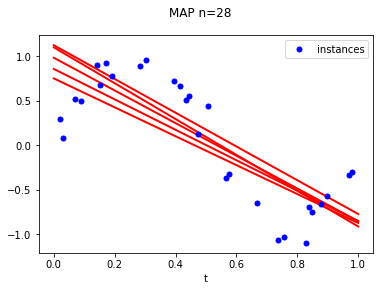

[30 47 23 28 12 18 24  4  5 44 35  8 69 36 38 67 26 29 54 63 61 50 59 40
 60 43 68 65 66 48  0  3 32 27 15]
Phi.shape:  (35, 2)
Phi_x.shape:  (100, 2)


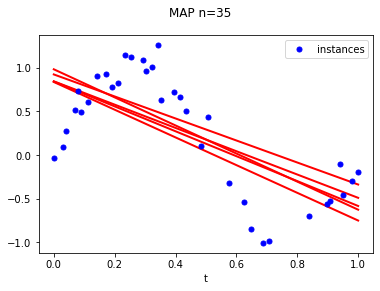

In [6]:
M = 2 # Número de pesos
alphaInv = 2
alpha  = float(1/alphaInv)
#%% modelo del Priori
m0 = np.zeros((M,)) # vector de ceros
S0 = alphaInv*np.eye(M)

#%% Your code
for i in range(5):
    # Randomize data sorting and get some data form this
    n=(i+1)*7
    ind = np.random.permutation(N_train)[:n] # index de las muestras escogidas para entrenamiento
    print(ind)
    xx = xTrain[ind]
    tt = tTrain[ind]

    # concatenacion por columnas, calculando phi
    Phi= np.concatenate((np.ones(xx.shape), xx), axis=1)
    print("Phi.shape: ", Phi.shape)
    
    Phi_x=np.concatenate((np.ones(x.shape), x), axis=1)
    print("Phi_x.shape: ",Phi_x.shape)
    
    

    # np.eye is identity matrix
    Sn_inv=alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi

    # Sn2=1/(alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi)

    Sn=np.linalg.inv(Sn_inv)
    #print(Sn)
    #print(Sn2)

    mn=((beta*Sn)@Phi.T)@tt

    #print(mn)



    # escojan las muestras con las que van a usar para implementar MAP
    # Calcular mn y Sn con las muestras escojidas
    # usar la función plot_posteriori(XX,tt,mn,Sn) (XX y tt son las muestras y sus salidas con las que calcularon 𝐦𝑛 y 𝐒𝑛)

    #plot_posterioriRecta(xx,tt,mn,Sn,title = 'MAP n='+str(n))
    plot_posteriori(x,Phi_x,xx,tt,mn,Sn,t_mean =None,t_var=None,xlim = [-1,1],ylim = [-1,1],nF = 5,title ='MAP n='+str(n),betaInv = 0.1)

# escojan las muestras con las que van a usar para implementar MAP
# Calcular mn y Sn con las muestras escojidas
# usar la función plot_posteriori(x,Phi(x),XX,tt,mn,Sn,title='titulo deseado') (XX y tt son las muestras y sus salidas con las que calcularon 𝐦𝑛 y 𝐒𝑛)
# el x y Phi(x) es cpon el fin de hacer las graficas con mejor resolución


# Respuesta para B
> # ¿Qué sucedio? 

Los modelos que resultan para representar a los datos no logran presentar bien a los datos que van resultando, entre mas datos trata de representarlos mejor pero no es optimo su representación

> # ¿Existe alguna forma de mejorarlo?

Puede que con otro tipo de regresión o otras caracteristicas para la regresión como polinomios de o e base Radial (RBF) puede gener un mejor modelo

**C.** A raiz de lo anterior use bases exponenciales (LinearRegression en sklearn.gaussian_process.kernels.RBF) y realice el mismo ejercicio de los incisos anteriores con este cambio. Recuerden guardar la matriz de las funciones bases evaluadas en los datos de entrada en la variable *Phi*. **Además deben calcular la Predicción sobre todos los datos, calcular la distribución predictiva para cada caso, la media de esa distribución la deben guardar en la variable *$t_{mean}$* y el vector varianza en *t_var* **. ¿Existe alguna diferencia? ¿Cuál? ¿Qué sucede con la varianza a medida que se agregan muestras para el calculo del posteriori?

Para esta tarea use la función  *plot_posteriori(x,Phi,xx,tt,m,S,t_mean =None,t_var=None,xlim = [-1,1],ylim = [-1,1],nF = 5,title = '',betaInv = 0.1)*; donde m = mn, S = Sn, y los demás argumentos son opcionales. El Phi que pide la función es el $\Phi(\boldsymbol{x})$ (sobre la variable x).  

[20 38  4  6 19 48 30]
Phi.shape:  (7, 100)


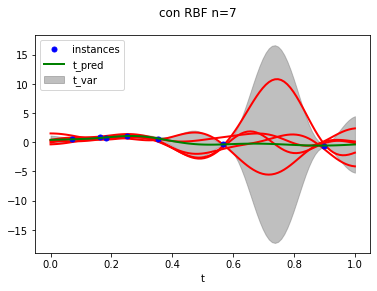

[40  4  9 64 24 20 32 52 66 12  2  6 35 14]
Phi.shape:  (14, 100)


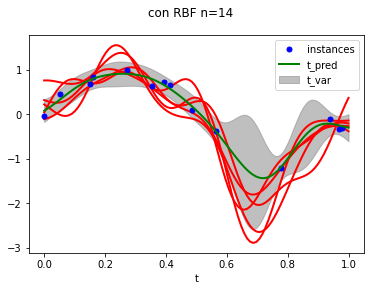

[64 69 18 57 60 44 56 28 13  9 46  7 24 30 26  0 67 34 15 38 59]
Phi.shape:  (21, 100)


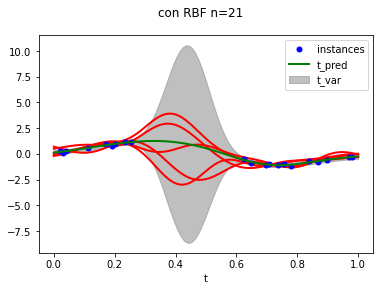

[41 21 53 28  4 37 24  3  2 10 35 51 46 16 38 36 18 44 12 19 56 30  9 47
 11 66  0  7]
Phi.shape:  (28, 100)


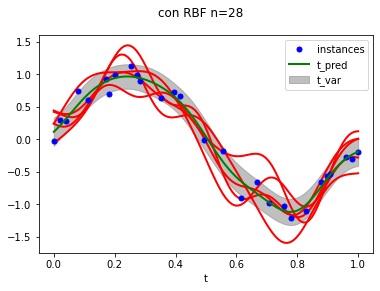

[64 65  5  1  9 47 16  4  8 13 32  7 48 25 42 57 11 29 38 68  0 58 66 52
 63 14 54 41 12 44 43 36 21 40 27]
Phi.shape:  (35, 100)


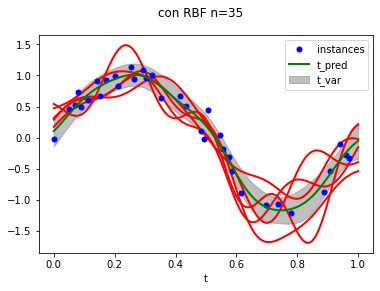

In [7]:


M = 100 # Número de pesos
alphaInv = 2
alpha  = float(1/alphaInv)
#%% modelo del Priori
m0 = np.zeros((M,)) # vector de ceros
S0 = alphaInv*np.eye(M)

lengthscale = 0.1
#%% Your code
from sklearn.gaussian_process.kernels import RBF


for i in range(5):
    n=(i+1)*7

    # Get training data xx and tt
    ind = np.random.permutation(N_train)[:n] # index de las muestras escogidas para entrenamiento
    print(ind)
    xx = xTrain[ind]
    tt = tTrain[ind]

    # Create RBF with sigma lengthscale
    rbf = RBF(lengthscale)

    # [:,None] convert to shape (n,1)
    # Get mu for RBF, Quantity of data are centroids
    mu=np.linspace(x.min(),x.max(),M)[:,None]


    # Get Phi from xx selected train data
    Phi= rbf(xx, mu)
    print("Phi.shape: ", Phi.shape)

    # np.eye is identity matrix
    Sn_inv=alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi

    # Sn2=1/(alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi)

    Sn=np.linalg.inv(Sn_inv)

    mn=((beta*Sn)@Phi.T)@tt

    Phi_plot=rbf(x, mu)

    # Phi_plot * mn
    t_mean=Phi_plot@mn
    
    # Matriz diagonalizada para la varianza
    t_var=np.diag(betaInv+Phi_plot@Sn@Phi_plot.T)




    plot_posteriori(x,Phi_plot,xx,tt,mn,Sn,t_mean=t_mean, t_var=t_var,plot_std=False,xlim=[x.min(),x.max()],title = 'con RBF n={}'.format(n))
#plot_posteriori(x,Phi_x,xx,tt,mn,Sn,t_mean =None,t_var=None,xlim = [-1,1],ylim = [-1,1],nF = 5,title ='MAP n='+str(n),betaInv = 0.1)

# escojan las muestras con las que van a usar para implementar MAP
# Calcular mn y Sn con las muestras escojidas
# usar la función plot_posteriori(x,Phi_plot,xx,tt,mn,Sn,plot_std=True,xlim=[x.min(),x.max()],title = 'titulo opcional') (XX y tt son las muestras y sus salidas con las que calcularon 𝐦𝑛 y 𝐒𝑛)

# Respuestas para C
> ## ¿Existe alguna diferencia? ¿Cuál? 

Las bases exponenciales (los valores Phi) con caracteristicas de funciones de base radial RBF mejora la los modelos de predicción para los datos del sistema 2, y en estas graficas se dió a visualizar la varianza y el modelo predecido donde se aprecia una varianza "reducida".


> ## ¿Qué sucede con la varianza a medida que se agregan muestras para el calculo del posteriori?

De manera similar a como se comportó encontrar el maximo posteriori con caracteristicas "lineales" entre más datos tiene mejor es la representación de los datos y menor es la varianza que este presenta

**D.** Realicen lo anterior para diferentes valores de $\beta^{-1}\in\{0.001,0.01,0.1,1\}$ y diferentes valores de $\alpha$ (estos son libres a ustedes) sobre el mismo sistema2. Para cada uno de los casos anteriores calcule la distribución predictiva y guarde la media de esta en *t_mean* y la diagnal se su matriz de covarianza en $t_var$.¿Afecta los parámetros $\beta$ y $\sigma$ la predicción? Si la afecta ¿Cómo? 

----------------------For betha 0.001-----------------------
[ 4 19 12 17 22 29 59]
Phi.shape:  (7, 100)


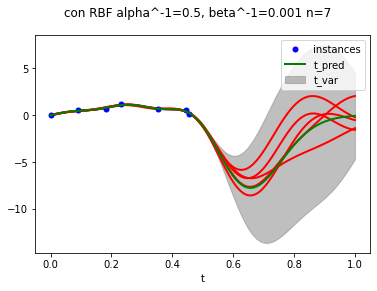

[65  1  7 12 13 43 19 20  3 35 69 42 26  5]
Phi.shape:  (14, 100)


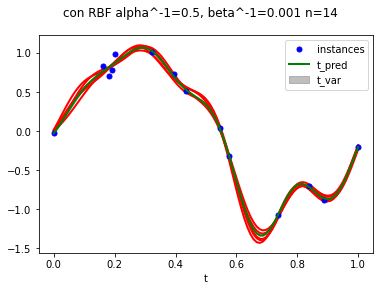

[55 44 64  4 20 12 53 54 33 37 52 67 68 31 45 43 59 51 63 23  1]
Phi.shape:  (21, 100)


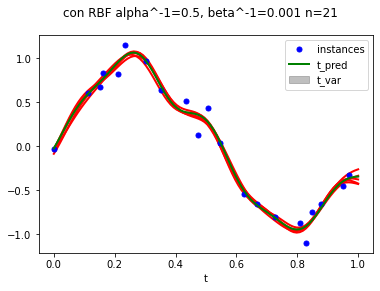

[65 12 30 63 48 27 21 42 67 22 39 68 36 54  8 60 11 37 56 59 29 33 62 13
 58 47 16 28]
Phi.shape:  (28, 100)


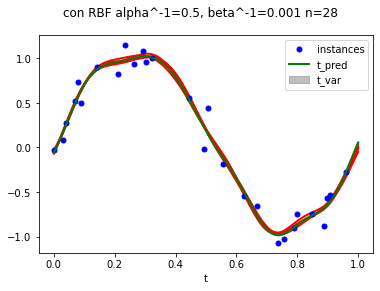

[60  1 42 61 35 37 14 40 62 56 65 15 44  3 64 29 16 17 52 58  4 25 53 39
 28 59 21 41 38 45 13 54 66 22 10]
Phi.shape:  (35, 100)


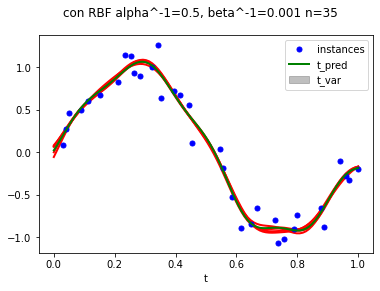

----------------------For betha 0.001-----------------------
[65 44 22  0 57 59 43]
Phi.shape:  (7, 100)


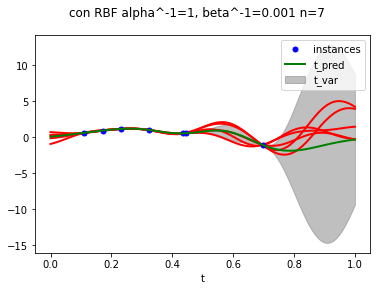

[14 29 56 57 61 20 47 66  3 22 45 52  5 37]
Phi.shape:  (14, 100)


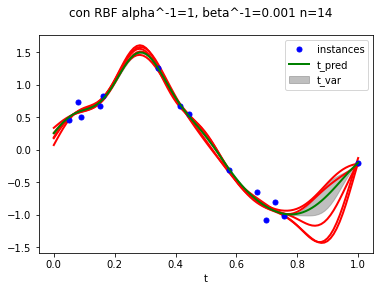

[60 54 11 55 43  0 32  1  7 20  8 49  3 67 41 13 30 25 40 27 15]
Phi.shape:  (21, 100)


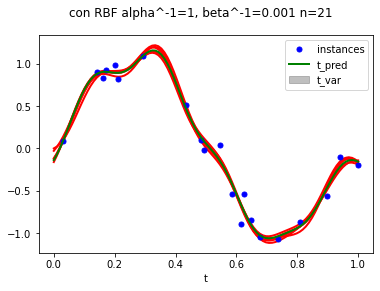

[47 67 68 61 58 54 43 20 57 24 11 38 48 55 49 65 10 39 50  6 59  7  0 56
 53 60 14 31]
Phi.shape:  (28, 100)


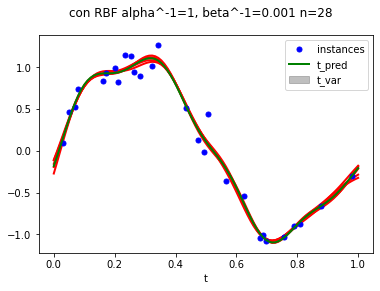

[ 1 45 55 37 34  6 16 17 22 65 44 19 50 52 49 40 69  3 38 12 26 64 25 21
 13 30  7  4 18 15 36 20 62 23 11]
Phi.shape:  (35, 100)


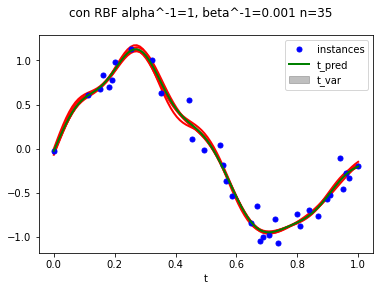

----------------------For betha 0.001-----------------------
[26 15  8 19 17 32 60]
Phi.shape:  (7, 100)


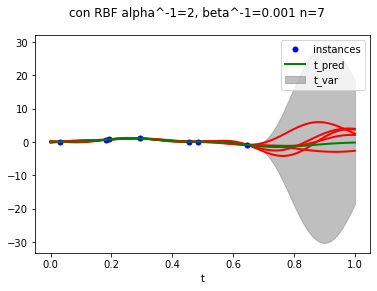

[ 0 17  2 15 60  9 45 33 40 69 63 20 64 44]
Phi.shape:  (14, 100)


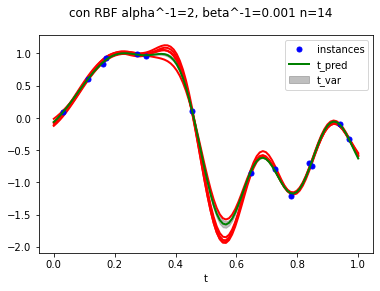

[46 64 51 48 27  4 10 12 13 21 29 42 65 14 17 60 47 23  5 38 37]
Phi.shape:  (21, 100)


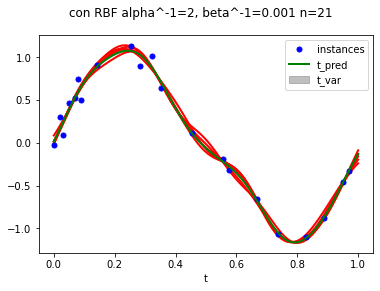

[60 24 21 22 29 41 40 14 68 36 43 65 61 44 48 32  3  1 42  7 45 35 46 67
  8  0 13 39]
Phi.shape:  (28, 100)


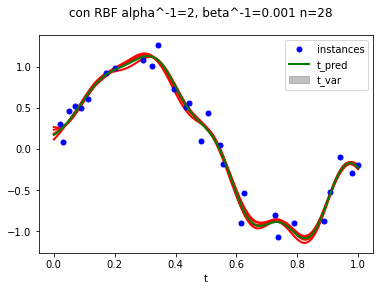

[21 16 38 36  7  8 50 20 42 19 27 63 18 57 24  0  2 58 43  5 68 14  1 30
 12 46 11 55 41 53 22 49 65 39 31]
Phi.shape:  (35, 100)


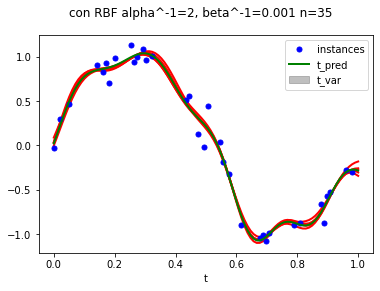

-----------------------For betha 0.01-----------------------
[33 39 40 54 21  3 30]
Phi.shape:  (7, 100)


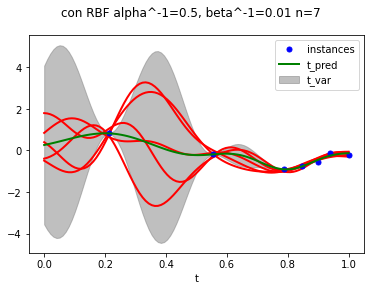

[38 51 23 66 11 18 46 20 50 69  2 65 63 14]
Phi.shape:  (14, 100)


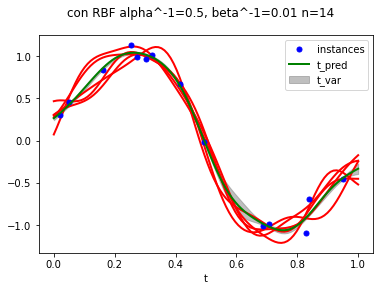

[15 36  1 48 18 21 59 25  7 64 35 29 41 60 34  2 67 49 22 62 28]
Phi.shape:  (21, 100)


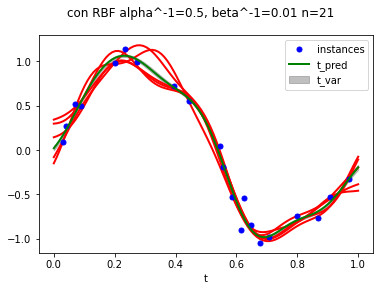

[40 11 23  4 50 45 12 27 69 19 61 21 15 39 62  1 35 64 52 46 28 17 60 10
 32 43  0 25]
Phi.shape:  (28, 100)


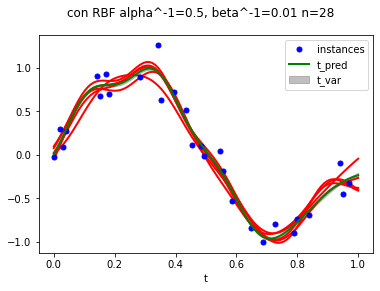

[40  0 54 33 37 15 30 22 41 58  5 28  8 36 10 19 42 11 60 59 66 18 34 67
 51  3 20 43 68 24 69  4 61 49 50]
Phi.shape:  (35, 100)


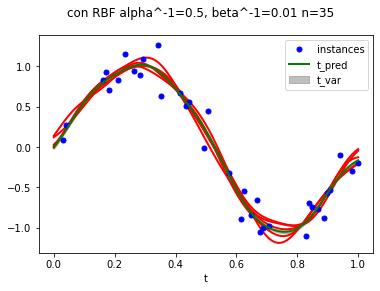

-----------------------For betha 0.01-----------------------
[29 57 48 42  4 41 62]
Phi.shape:  (7, 100)


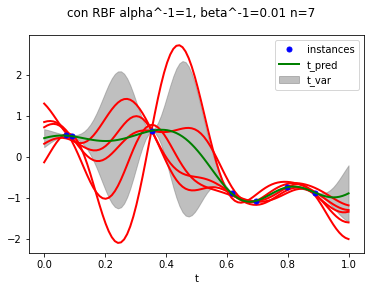

[37  0 54 19 36 18 58 38 61 27  6  8 50 16]
Phi.shape:  (14, 100)


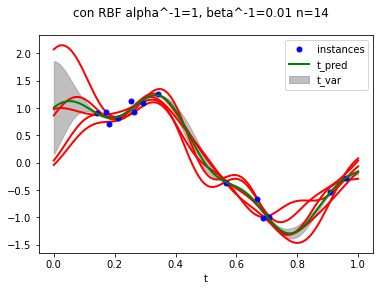

[27  7 26  2 36 42 40 50 68 23  5 48 67 54 17 16 65 30 31  9 59]
Phi.shape:  (21, 100)


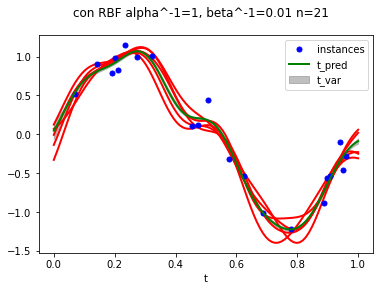

[38  2  4 48 44 69  1 23 63 26 32 34 25 55 20  7 40  0 19 30 62 16 65 14
 50 60  9 29]
Phi.shape:  (28, 100)


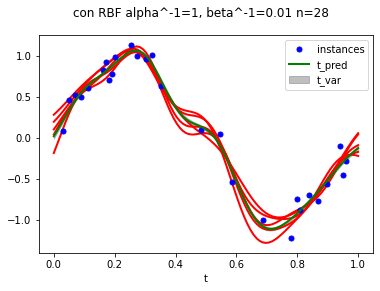

[10 28 11 27 46 69 22  2 52 15 65 13 58 68  7 50  0 64 19 55 42 41  5 45
 44 30 40 39 61 31 17  9 66  4 56]
Phi.shape:  (35, 100)


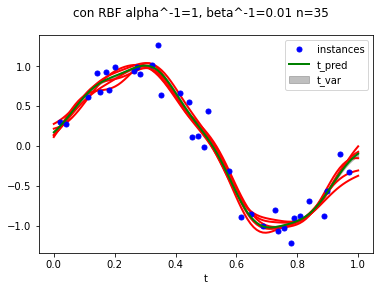

-----------------------For betha 0.01-----------------------
[62 58 57 15 47 65 28]
Phi.shape:  (7, 100)


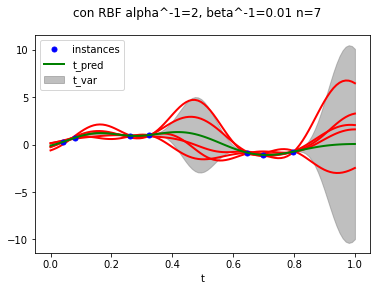

[55 25  1 68 66 10 16 30 44  7  0 41 48 64]
Phi.shape:  (14, 100)


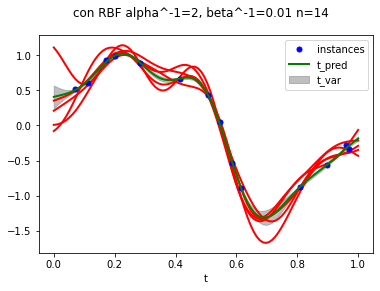

[21 23 67 47 39 65  1 29 12 19 14 46 18 44  6 50 38  8 13 32 24]
Phi.shape:  (21, 100)


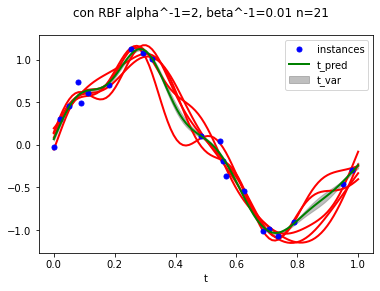

[39 45 58 28  7 42 47 67 62 20  4  8  5 50 48 55 59 13 66 12 46 11 26 65
 31 41  6  2]
Phi.shape:  (28, 100)


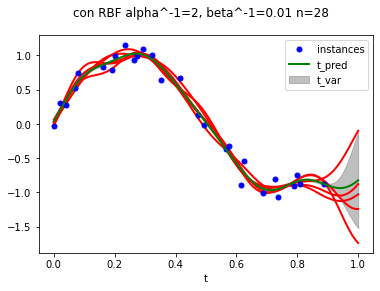

[68 36 55 31 23 32 49 69 17 54 30  4 51 63 12 44 47  1 26  3 45 14 35 37
 57 65 50 66  9 42 21 13 56 33 27]
Phi.shape:  (35, 100)


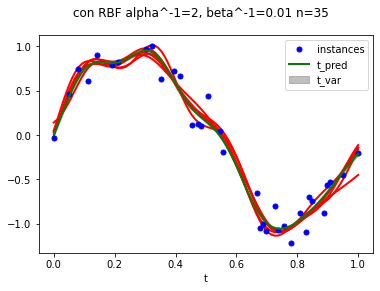

-----------------------For betha 0.1------------------------
[42 24 54 31 45 37 61]
Phi.shape:  (7, 100)


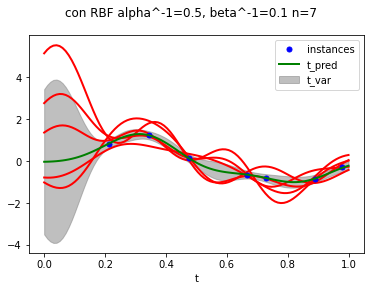

[26 15 46 67 58  0 48 60 54  9 10 62 63 22]
Phi.shape:  (14, 100)


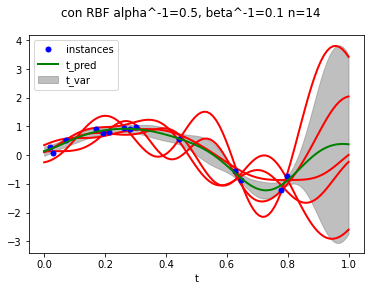

[28 38 60 48 21 68 35 62  3 69 34 63  8 47 37  1 39  7 15  0 27]
Phi.shape:  (21, 100)


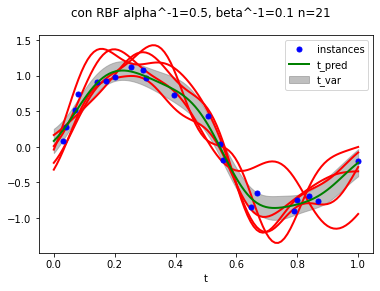

[45 38 56 25 37 41 16 63 68 28  8  5  9 40  6 29 66 48 53 32 23 64 34 42
 35 59 54 62]
Phi.shape:  (28, 100)


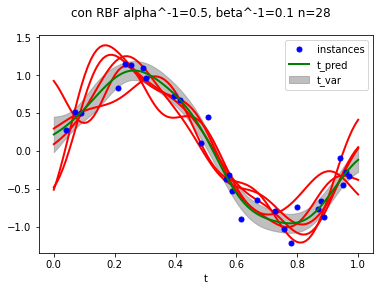

[23  5 64 15 20 17 25 26 18 32 11 59 69 66 14 55 68 35  3 47  0 46 48 40
 31 39 12  6 61 57 58 52 62 33 10]
Phi.shape:  (35, 100)


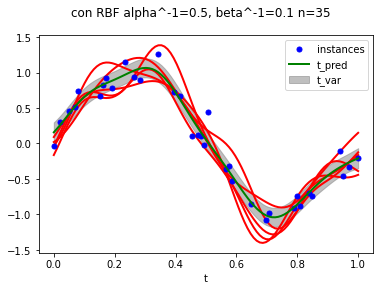

-----------------------For betha 0.1------------------------
[33 35 19 62 64 44 25]
Phi.shape:  (7, 100)


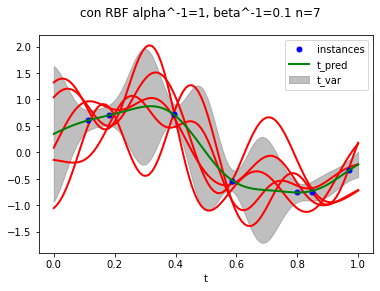

[27 44  5  8 14 35 38 56 49 58 16 59 30 45]
Phi.shape:  (14, 100)


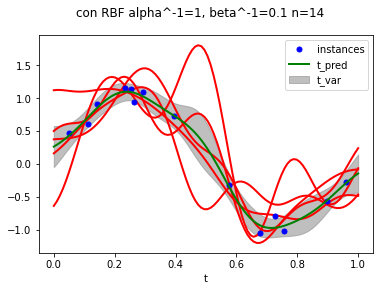

[ 9 33 52 18 42 34 48 20  5  2 67  0  8 40  4 24 69 56 55 11 57]
Phi.shape:  (21, 100)


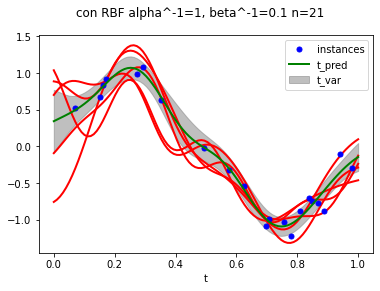

[34  9 32 50 24 56 48 53 65 41 17 22 44 67 28 47 20 46 49  0 14  4 18 51
 69 43 54 27]
Phi.shape:  (28, 100)


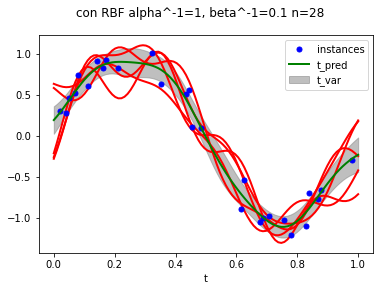

[ 5 11 42 52 69 12 38 28 18 29 51 31  0 54 62 24 55 67 48 25 20 23 35  1
 33 47  3 44  7 14 41 37 34 60 61]
Phi.shape:  (35, 100)


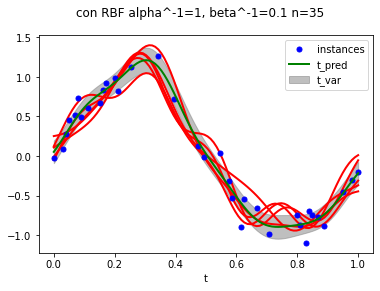

-----------------------For betha 0.1------------------------
[64 19 43  6 18 21 55]
Phi.shape:  (7, 100)


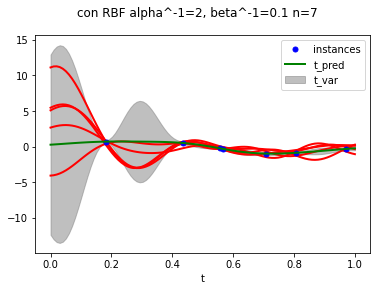

[69 63 47 33  1 27  4  2 64 57 34 32 51 46]
Phi.shape:  (14, 100)


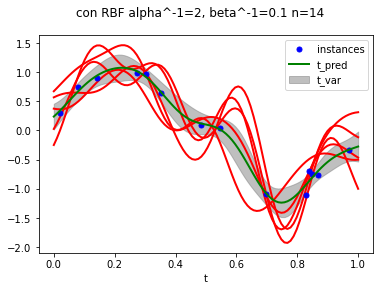

[ 1 56 33 11 14 50 34 66 17 29 58 69 23  2 16 31 59 42 10 28 62]
Phi.shape:  (21, 100)


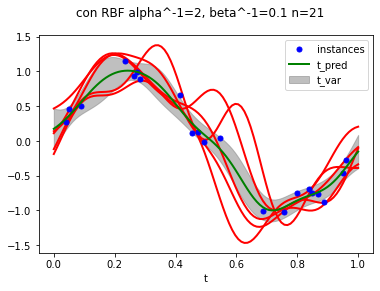

[55 53 44 54 10 66 62  4 17 48 20 31 56 50 23 18 45  3  0 59 15 47 33 22
 34  1 24 42]
Phi.shape:  (28, 100)


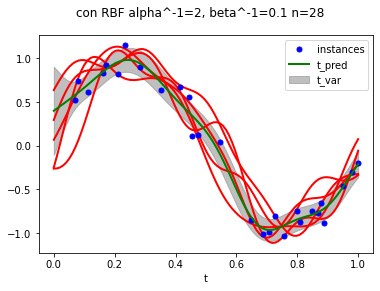

[51  9 12 21 66  2 50 56  4 60 22 16 14 33  8 57  0 58 44 11 41 26  5 30
 69 35 53 43 61 20 47 49 27 25 40]
Phi.shape:  (35, 100)


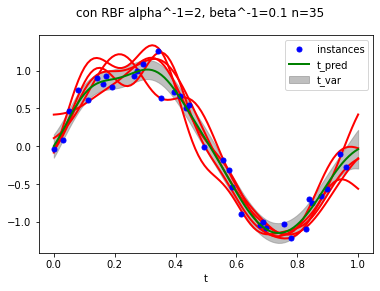

------------------------For betha 1-------------------------
[ 6 43 17  9 50 31 53]
Phi.shape:  (7, 100)


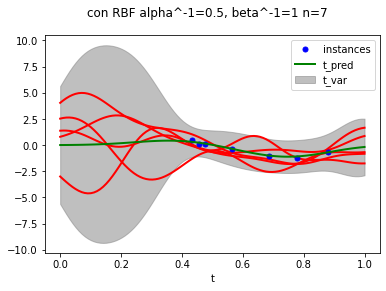

[22 66 48 53  0 39 58 43 18  8 11 60 15 34]
Phi.shape:  (14, 100)


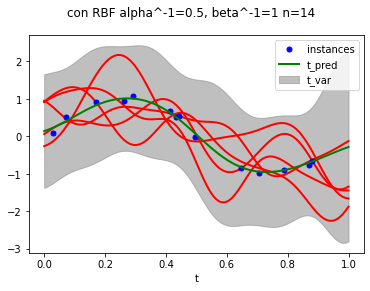

[29 68 59 65 28  4 35 58 69 19 54 40 56 45 63 36 21 53  6 60 47]
Phi.shape:  (21, 100)


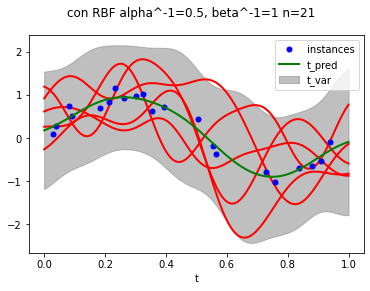

[61 59 40  0 17 48 42 10 33 24 49 11  9 34 15 53 60 52 62 66 16 45 47 54
 12 20 58 21]
Phi.shape:  (28, 100)


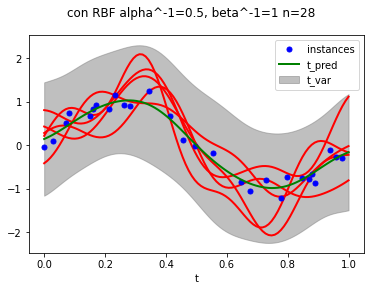

[ 4  7 18  6 52 48 32 62 46 33 60 49 50 53 34 11  3 25  8 28  2 44 54  9
 30 47 17 20 16 45 39 29 14 69 67]
Phi.shape:  (35, 100)


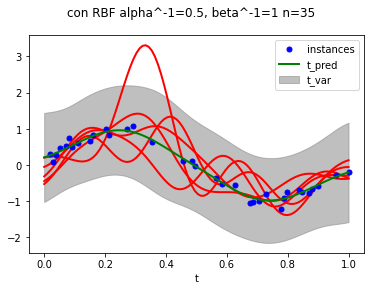

------------------------For betha 1-------------------------
[36 57 12 59 26 32 48]
Phi.shape:  (7, 100)


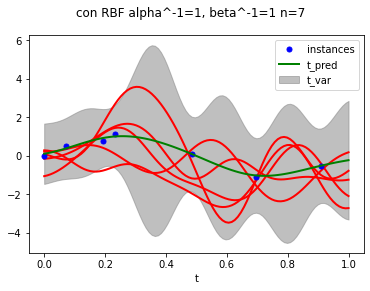

[63 30 29 15 54 27 62 31 28  2 50  5 35 43]
Phi.shape:  (14, 100)


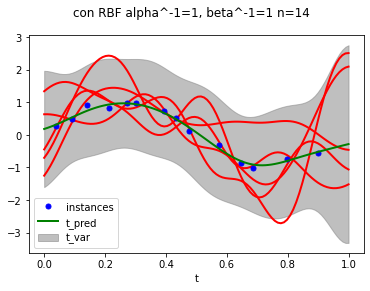

[ 7 56 54 63  4 44 65 17 62 61  2 55 18 34 20 36 14 29 16 66 58]
Phi.shape:  (21, 100)


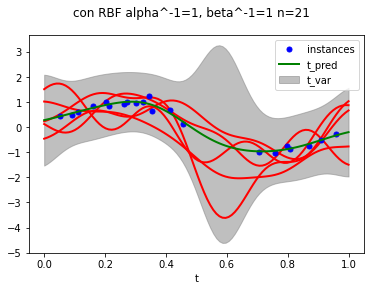

[10 18 46 69 35 68 41  9 24 26 58 56  2 67 14 20 12 63 51 32 13  7 42 52
  8  6  5 43]
Phi.shape:  (28, 100)


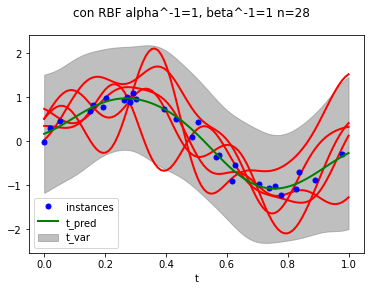

[35 27 37 22 21 60 13 36 45 30 65 46 54 44 39 40  8 23 47 42 43  4 32 14
  0 11 28 41 68 31  7 29 26 16  5]
Phi.shape:  (35, 100)


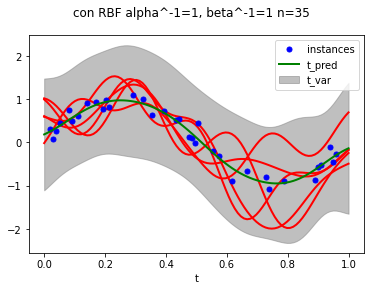

------------------------For betha 1-------------------------
[39 22 57 32 35 11 66]
Phi.shape:  (7, 100)


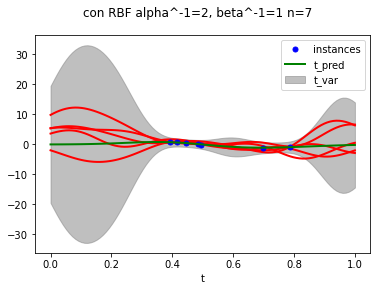

[16 27 64 35 63 59 25 52  7 17 19 57 28 18]
Phi.shape:  (14, 100)


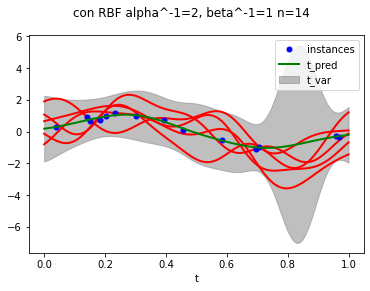

[50 37 65 45 23  9  4 25 67 60 17 52 44 57 59 34  5 21 31 33 30]
Phi.shape:  (21, 100)


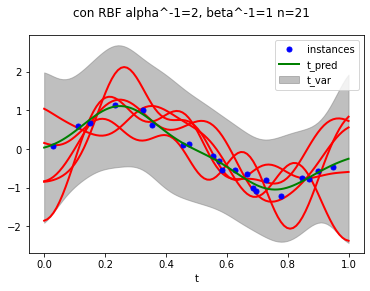

[10 15 48 13 12 29 18 22 41 16  9 32 28  6 26  4 37 54 58 31 45 24 30 57
  1 56 21 51]
Phi.shape:  (28, 100)


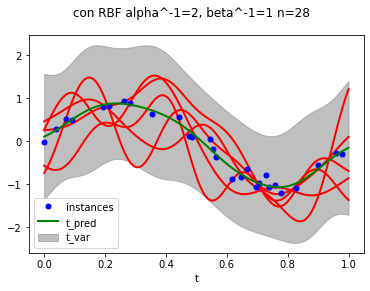

[11 46 38 25 48 15  8  4 40 24 53 60 39 55 16 67 13 65 61 52  3  1 28 62
 57 42  9 43  2 32 17 68 37 31 56]
Phi.shape:  (35, 100)


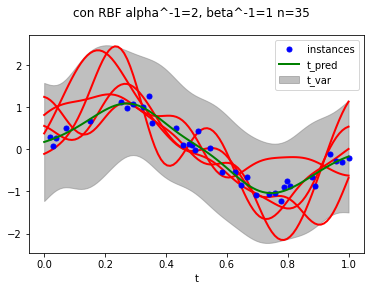

In [8]:
M = 100 # Número de pesos
alphaInv = 2
alpha  = float(1/alphaInv)


#%% modelo del Priori
m0 = np.zeros((M,1)) # vector de ceros
S0 = alphaInv*np.eye(M)

lengthscale = 0.1
#%% Your code
for betaInv in [0.001, 0.01, 0.1, 1]:
    beta = 1/betaInv
    for alphaInv in [0.5, 1, 2]:
        alpha  = float(1/alphaInv)
        print("For betha {}".format(betaInv).center(60,"-"))
        for i in range(5):
            n=(i+1)*7



            # Get training data xx and tt
            ind = np.random.permutation(N_train)[:n] # index de las muestras escogidas para entrenamiento
            print(ind)
            xx = xTrain[ind]
            tt = tTrain[ind]

            # Create RBF with sigma lengthscale
            rbf = RBF(lengthscale)

            # [:,None] convert to shape (n,1)
            # Get mu for RBF, Quantity of data are centroids
            mu=np.linspace(x.min(),x.max(),M)[:,None]


            # Get Phi from xx selected train data
            Phi= rbf(xx, mu)
            print("Phi.shape: ", Phi.shape)



            # np.eye is identity matrix
            Sn_inv=alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi

            # Sn2=1/(alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi)

            Sn=np.linalg.inv(Sn_inv)



            mn=((beta*Sn)@Phi.T)@tt

            #print("sn",Sn.shape)
            # concatenacion por columnas
            #Sn= np.concatenate((S0, Sn), axis=1)
            #print("sn",Sn.shape)
            # concatenacion por columnas
            #print(m0.shape)

            #mn= np.concatenate((m0, mn), axis=1)

            Phi_plot=rbf(x, mu)


            # Phi_plot * mn
            t_mean=Phi_plot@mn

            # Matriz diagonalizada para la varianza
            t_var=np.diag(betaInv+Phi_plot@Sn@Phi_plot.T)




            plot_posteriori(x,Phi_plot,xx,tt,mn,Sn,t_mean=t_mean, t_var=t_var,plot_std=False,xlim=[x.min(),x.max()],title = 'con RBF alpha^-1={}, beta^-1={} n={}'.format(alphaInv, betaInv, n))


# escojan las muestras con las que van a usar para implementar MAP
# Calcular mn y Sn con las muestras escojidas
# usar la función plot_posteriori(x,Phi_plot,xx,tt,mn,Sn,t_mean=t_mean,t_var=t_var,xlim=[x.min(),x.max()],title = 'titulo opcional') (XX y tt son las muestras y sus salidas con las que calcularon 𝐦𝑛 y 𝐒𝑛)


**E.** Usando los mismo datos de entrenamiento del sistema2 ($x_{train}$,$t_{train}$) realice el calculo del Maximum A Posteriori(MAP) y a partir de esta calcula la distribución predictiva sobre *x* (variable) suponiendo que se desconoce los valores de $\beta$ y de $\alpha$, donde la media de esta última deben de guardarlo en la variable *t_mean_MAP* y la diagonal de la matiz de covarianza en *y_var_MAP*. Ahora, compare este con el resultado obtenido realizando la predicción sobre *x* con la herramienta *sklearn.linear_model.BayesianRidge*, y guarde la predicción en *t_mean_sk* y su varianza en *t_var_sk*. Use en ambos casos funciones bases radiales (RBF). ¿Existe alguna diferencia en la predicción del MAP y la predcción por BayesianRidge? ¿sklearn.linear_model.BayesianRidge supone conocidos el $\alpha$ y el $\beta$? ¿Cómo estima estos parámetros?

In [17]:
M = 10 # número de funciones base
# Modelo Priori de los Ws
betaInv = 0.15
beta = float(1/betaInv)
alphaInv = 0.001 # 2
alpha = float(1/alphaInv)
m0 = np.zeros((M,)) # vector de ceros
S0 = alphaInv*np.eye(M)

#%% Your code
from sklearn.linear_model import BayesianRidge



tol_alpha = 1e-5

tol_beta = 1e-5

maxiter = 200


i = 0 # contador

while erroralpha > tol_alpha and errorbeta > tol_beta and i<maxiter:

    # Calcula mn y Sn con MAP


    # calcula beta con la expresion dada


    # calcula alpha con la expresión dada

    i += 1 # incrementa contador


    errorbeta = np.abs(beta_anterior - beta_calculada) # estos betas debes ver como los amacenas o como los vas cambiando

    erroralpha = np.abs(alpha_anterior - alpha_calculada)




# de aquí para adelante ya calculas con el mn y Sn que te dieron con los últimos beta y alpha el t_mean_MAP y el t_var_MAP y calculas por medio de sklearn los otros.



for i in range(5):
    n=(i+1)*7
    
    # Get training data xx and tt
    ind = np.random.permutation(N_train)[:n] # index de las muestras escogidas para entrenamiento
    print(ind)
    xx = xTrain[ind]
    tt = tTrain[ind]

    # Create RBF with sigma lengthscale
    rbf = RBF(lengthscale)

    # [:,None] convert to shape (n,1)
    # Get mu for RBF, Quantity of data are centroids
    mu=np.linspace(x.min(),x.max(),M)[:,None]


    # Get Phi from xx selected train data
    Phi= rbf(xx, mu)
    print("Phi.shape: ", Phi.shape)



    # np.eye is identity matrix
    Sn_inv=alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi

    # Sn2=1/(alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi)

    Sn=np.linalg.inv(Sn_inv)



    mn=((beta*Sn)@Phi.T)@tt

    #print("sn",Sn.shape)
    # concatenacion por columnas
    #Sn= np.concatenate((S0, Sn), axis=1)
    #print("sn",Sn.shape)
    # concatenacion por columnas
    #print(m0.shape)

    #mn= np.concatenate((m0, mn), axis=1)

    Phi_plot=rbf(x, mu)


    # Phi_plot * mn
    t_mean_MAP=Phi_plot@mn

    # Matriz diagonalizada para la varianza
    y_var_MAP=np.diag(betaInv+Phi_plot@Sn@Phi_plot.T)
    
    
    
    
    
    ### With regressión 
    # Create RBF with sigma lengthscale
    rbf = RBF(lengthscale)
        
    # [:,None] convert to shape (n,1)
    # Quantity of data are centroids
    mu=np.linspace(x.min(),x.max(),M)[:,None]

    Phi=rbf(xx, mu)
    


    ## Using 't' target data from before cell - system 2
    clf = BayesianRidge().fit(Phi,tt)
    
    Phi = clf.predict(Phi).reshape(-1,1)
    print(Phi)
    print(Phi.shape)
    # np.eye is identity matrix
    Sn_inv=alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi

    # Sn2=1/(alpha*np.eye(Phi.shape[1]) + (beta*Phi.T)@Phi)

    Sn=np.linalg.inv(Sn_inv)



    mn=((beta*Sn)@Phi.T)@tt
    
    Phi_plot=rbf(x, mu)
    clf = BayesianRidge().fit(Phi_plot,tt)
    
    Phi_plot = clf.predict(Phi_plot).reshape(-1,1)

    # Phi_plot * mn
    t_mean_MAP=Phi_plot@mn

    # Matriz diagonalizada para la varianza
    y_var_MAP=np.diag(betaInv+Phi_plot@Sn@Phi_plot.T)
    
    
    # Phi_plot * mn
    t_mean_sk=clf_Phi@mn

    # Matriz diagonalizada para la varianza
    t_var_sk=np.diag(betaInv+clf_Phi@Sn@clf_Phi.T)


    #plot_posteriori(x,Phi_plot,xx,tt,mn,Sn,t_mean=t_mean, t_var=t_var,plot_std=False,xlim=[x.min(),x.max()],title = 'con RBF alpha^-1={}, beta^-1={} n={}'.format(alphaInv, betaInv, n))



#%%
    plt.fill_between(x.reshape((x.size,)),t_mean_MAP-t_var_MAP,t_mean_MAP+t_var_MAP,color = 'pink',alpha = 0.6,label = 't_var_MAP')
    plt.fill_between(x.reshape((x.size,)),t_mean_sk-t_var_sk,t_mean_sk+t_var_sk,color = 'gray',alpha = 0.2,label = 't_var_sk')
    plt.plot(x,t_mean_MAP,linewidth = 2,label = 't_pred_MAP',color = 'k')
    plt.plot(x,t_mean_sk,linewidth = 2,label = 't_pred_sk',color = 'g')

    plt.scatter(xTrain,tTrain,label = 'Training sampels')
    plt.legend()

[22 26 35  3 27  1 61]
Phi.shape:  (7, 10)
[[ 0.54558135]
 [ 0.91037149]
 [ 0.84565687]
 [-0.15779337]
 [ 0.80154112]
 [ 0.06484013]
 [ 1.0539251 ]]
(7, 1)


c:\program files\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [100, 7]